# Getting PRs & Issues

In [1]:
import MySQLdb

In [2]:
import getpass

In [3]:
import pandas as pd

In [4]:
db = MySQLdb.connect(host='sansa.cs.uoregon.edu', port=3331, user='ideas_user', passwd=getpass.getpass('db pass:\t'), db='ideas_db', charset='utf8', read_timeout=86400)

db pass:	········


In [5]:
cursor = db.cursor()

In [6]:
def get_prs():
    query = '''
    select proj.id as project_id, proj.name as project_name,
	   proj.last_updated as project_last_updated, proj.source_url as project_source_url,
       proj.fork_of_id as project_fork_of_id, proj.child_of_id as project_child_of_id,
       p.id as pr_id, p.title as pr_title, p.description as pr_description, p.updated_at as pr_updated_at, p.created_at pr_created_at,
       p.locked as pr_locked, p.url as pr_url, p.number as pr_number, p.state as pr_state, p.merged_at as pr_merged_at,
       p.head_sha as pr_head_sha, a1.id as pr_author_id, a1.username as pr_author_username, a1.email as pr_author_email,
       a1.name as pr_author_name, a1.url as pr_author_url, m.id as milestone_id, m.title as milestone_title,
       m.description as milestone_description, m.state as milestone_state, m.due_on as milestone_due_on,
       m.created_at as milestone_created_at, m.updated_at as milestone_updated_at, l.id as pr_label_id, l.name as pr_label,
       a2.id as pr_assignee_id, a2.name as pr_assignee_name, a2.url as pr_assignee_url, a2.username as pr_assignee_username, a2.email as pr_assignee_email,
       ct.id as pr_sha_id, ct.sha as pr_sha, comm.id as pr_comment_id, comm.created_at as pr_comment_created_at, comm.updated_at as pr_comment_updated_at, comm.body as pr_comment_body,
	   a3.id as pr_comment_author_id, a3.name as pr_comment_author_name, a3.url as pr_comment_author_url, a3.username as pr_comment_author_username, a3.email as pr_comment_author_email
    from project proj join pr p on(p.project_id = proj.id) join author a1 on(a1.id=p.author_id) 
	   left join milestone m on(m.pr_id=p.id) left join pr_has_label phl on(phl.pr_id=p.id) left join label l on(l.id=phl.label_id)
       left join pr_has_assignee pha on(pha.pr_id=p.id) left join author a2 on(a2.id=pha.assignee_id)
       left join pr_has_commit phc on(phc.pr_id=p.id) left join commit_tag ct on(ct.id=phc.commit_id)
       left join comment comm on(comm.pr_id=p.id) left join author a3 on(a3.id=comm.author_id);
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    cols = [col[0] for col in cursor.description]
    return pd.DataFrame(data, columns=cols)
    

In [7]:
df = get_prs()

In [8]:
df.shape

(139950, 47)

In [9]:
df.head()

,project_id,project_name,project_last_updated,project_source_url,project_fork_of_id,project_child_of_id,pr_id,pr_title,pr_description,pr_updated_at,...,pr_sha,pr_comment_id,pr_comment_created_at,pr_comment_updated_at,pr_comment_body,pr_comment_author_id,pr_comment_author_name,pr_comment_author_url,pr_comment_author_username,pr_comment_author_email
0,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,2243,Update manual to refer to Github rather than SVN.,Just the bare minimum changes to the manual to...,2017-01-12 19:02:04,...,235ee0e89e6f9ccc514bfadb48a6c3da162e7e35,16108.0,2017-01-12 18:54:20,2017-01-12 18:54:20,?,3282.0,Graham Lopez,https://github.com/grahamlopez,grahamlopez,
1,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,2244,formatting cleanup for README display on GitHub,Fixed some of the README to display better on ...,2017-01-12 19:31:56,...,5048e7de68e8441c7558aca4bd4938dc2b6482b5,NaN,NaT,NaT,None,NaN,None,None,None,None
2,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,2245,Mention release versions available via git mas...,,2017-01-12 20:33:41,...,a2530c71af4a147b3f7119b2eb9095e307bbbb1d,NaN,NaT,NaT,None,NaN,None,None,None,None
3,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,2246,update a line in the manual for github test.,,2017-01-12 22:07:38,...,54ee893acbce0e5fa4f5b66322fb430a7ce82d0d,16109.0,2017-01-12 21:56:07,2017-01-12 21:56:07,This is a good improvement to manual. I will a...,3270.0,None,https://github.com/prckent,prckent,None
4,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,2246,update a line in the manual for github test.,,2017-01-12 22:07:38,...,54ee893acbce0e5fa4f5b66322fb430a7ce82d0d,16110.0,2017-01-12 21:59:49,2017-01-12 21:59:49,"I believe Graham is away, so I will merge this...",3270.0,None,https://github.com/prckent,prckent,None


In [10]:
df.columns

Index(['project_id', 'project_name', 'project_last_updated',
       'project_source_url', 'project_fork_of_id', 'project_child_of_id',
       'pr_id', 'pr_title', 'pr_description', 'pr_updated_at', 'pr_created_at',
       'pr_locked', 'pr_url', 'pr_number', 'pr_state', 'pr_merged_at',
       'pr_head_sha', 'pr_author_id', 'pr_author_username', 'pr_author_email',
       'pr_author_name', 'pr_author_url', 'milestone_id', 'milestone_title',
       'milestone_description', 'milestone_state', 'milestone_due_on',
       'milestone_created_at', 'milestone_updated_at', 'pr_label_id',
       'pr_label', 'pr_assignee_id', 'pr_assignee_name', 'pr_assignee_url',
       'pr_assignee_username', 'pr_assignee_email', 'pr_sha_id', 'pr_sha',
       'pr_comment_id', 'pr_comment_created_at', 'pr_comment_updated_at',
       'pr_comment_body', 'pr_comment_author_id', 'pr_comment_author_name',
       'pr_comment_author_url', 'pr_comment_author_username',
       'pr_comment_author_email'],
      dtype='object

In [11]:
def get_commits():
    query = '''
    select proj.id as project_id, proj.name as project_name,
	   proj.last_updated as project_last_updated, proj.source_url as project_source_url,
       proj.fork_of_id as project_fork_of_id, proj.child_of_id as project_child_of_id,
       c.id as commit_id, c.hash as commit_sha, c.datetime as commit_datetime, c.message as commit_message,
       c.branch as commit_branch, a.id as author_id, a.username as author_username, a.name as author_name,
       a.email as author_email, a.url as author_url, d.file_path as diff_file_path, d.language as diff_language,
       d.body as diff_body
    from project proj join commit c on(proj.id=c.project_id) join author a on(c.author_id=a.id)
        join diff d on (d.commit_id=c.id)
    where proj.name = 'qmcpack'
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    cols = [col[0] for col in cursor.description]
    return pd.DataFrame(data, columns=cols)

In [12]:
df2 = get_commits()

In [13]:
df2.shape

(66791, 19)

In [14]:
df2.head()

,project_id,project_name,project_last_updated,project_source_url,project_fork_of_id,project_child_of_id,commit_id,commit_sha,commit_datetime,commit_message,commit_branch,author_id,author_username,author_name,author_email,author_url,diff_file_path,diff_language,diff_body
0,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,111964,026737554d112c2e9771267a13bc9a92d0c75b21,2021-02-27 23:05:16,Update DT::updatePartial,* develop\n remotes/origin/HEAD -> origin/dev...,1730,Ye Luo,None,yeluo@anl.gov,None,src/Particle/DistanceTableData.h,PLACEHOLDER,- /** update the distance table by the pair r...
1,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,111964,026737554d112c2e9771267a13bc9a92d0c75b21,2021-02-27 23:05:16,Update DT::updatePartial,* develop\n remotes/origin/HEAD -> origin/dev...,1730,Ye Luo,None,yeluo@anl.gov,None,src/Particle/ParticleSet.cpp,PLACEHOLDER,"- for (int i = 0, n = DistTables.size(); i ..."
2,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,111964,026737554d112c2e9771267a13bc9a92d0c75b21,2021-02-27 23:05:16,Update DT::updatePartial,* develop\n remotes/origin/HEAD -> origin/dev...,1730,Ye Luo,None,yeluo@anl.gov,None,src/Particle/SoaDistanceTableAAOMPTarget.h,PLACEHOLDER,"- inline void update(IndexType iat, bool part..."
3,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,111964,026737554d112c2e9771267a13bc9a92d0c75b21,2021-02-27 23:05:16,Update DT::updatePartial,* develop\n remotes/origin/HEAD -> origin/dev...,1730,Ye Luo,None,yeluo@anl.gov,None,src/Particle/SoaDistanceTableAB.h,PLACEHOLDER,"- inline void update(IndexType iat, bool part..."
4,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,111964,026737554d112c2e9771267a13bc9a92d0c75b21,2021-02-27 23:05:16,Update DT::updatePartial,* develop\n remotes/origin/HEAD -> origin/dev...,1730,Ye Luo,None,yeluo@anl.gov,None,src/Particle/SoaDistanceTableABOMPTarget.h,PLACEHOLDER,"- inline void update(IndexType iat, bool part..."


In [18]:
sha = '026737554d112c2e9771267a13bc9a92d0c75b21'
pr_info = df.query(f'pr_head_sha == "{sha}"')
commit_info = df2.query(f'commit_sha == "{sha}"')
#display(pr_info.head(1), commit_info.head(1))
pr_info

,project_id,project_name,project_last_updated,project_source_url,project_fork_of_id,project_child_of_id,pr_id,pr_title,pr_description,pr_updated_at,...,pr_sha,pr_comment_id,pr_comment_created_at,pr_comment_updated_at,pr_comment_body,pr_comment_author_id,pr_comment_author_name,pr_comment_author_url,pr_comment_author_username,pr_comment_author_email
135483,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,4316,Introduce debug build GL check in non-batched ...,## Proposed changes\r\n1. Add debug build chec...,2021-02-28 16:09:07,...,0790984db39e7b38ec0b5126ad97ac637b677e7a,NaN,NaT,NaT,None,NaN,None,None,None,None
135484,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,4316,Introduce debug build GL check in non-batched ...,## Proposed changes\r\n1. Add debug build chec...,2021-02-28 16:09:07,...,bed042a5370b4af206626702d0b531362a8f4235,NaN,NaT,NaT,None,NaN,None,None,None,None
135485,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,4316,Introduce debug build GL check in non-batched ...,## Proposed changes\r\n1. Add debug build chec...,2021-02-28 16:09:07,...,a194e3349ca294b61f13335ef7c9351a110cd8c2,NaN,NaT,NaT,None,NaN,None,None,None,None
135486,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,4316,Introduce debug build GL check in non-batched ...,## Proposed changes\r\n1. Add debug build chec...,2021-02-28 16:09:07,...,026737554d112c2e9771267a13bc9a92d0c75b21,NaN,NaT,NaT,None,NaN,None,None,None,None


In [17]:
def get_issues():
    query = '''
    select proj.id as project_id, proj.name as project_name,
	   proj.last_updated as project_last_updated, proj.source_url as project_source_url,
       proj.fork_of_id as project_fork_of_id, proj.child_of_id as project_child_of_id,
	   i.id as issue_id, i.title as issue_title, i.description as issue_description, i.created_at as issue_created_at,
	   i.updated_at as issue_updated_at, i.closed_at as issue_closed_at, i.locked as issue_locked, i.state as issue_state,
       i.url as issue_url, i.number as issue_number, a1.username as issue_author_username, a1.email as issue_author_email,
       a1.name as issue_author_name, a1.url as issue_author_url, m.id as milestone_id, m.title as milestone_title,
       m.description as milestone_description, m.state as milestone_state, m.due_on as milestone_due_on,
       m.created_at as milestone_created_at, m.updated_at as milestone_updated_at, l.id as issue_label_id, l.name as issue_label,
       a2.id as issue_assignee_id, a2.name as issue_assignee_name, a2.url as issue_assignee_url, a2.username as issue_assignee_username, a2.email as issue_assignee_email,
       comm.id as issue_comment_id, comm.created_at as issue_comment_created_at, comm.updated_at as issue_comment_updated_at, comm.body as issue_comment_body,
	   a3.id as issue_comment_author_id, a3.name as issue_comment_author_name, a3.url as issue_comment_author_url, a3.username as issue_comment_author_username, a3.email as issue_comment_author_email
    from project proj join issue i on(proj.id=i.project_id) join author a1 on(a1.id=i.author_id) 
         left join milestone m on(m.issue_id=i.id) left join issue_has_label ihl on(ihl.issue_id=i.id) 
         left join label l on(l.id=ihl.label_id) left join issue_has_assignee iha on(iha.issue_id=i.id)
         left join author a2 on(iha.assignee_id=a2.id) left join comment comm on(comm.issue_id=i.id) left join author a3 on(a3.id=comm.author_id);'''
    cursor.execute(query)
    data = cursor.fetchall()
    cols = [col[0] for col in cursor.description]
    return pd.DataFrame(data, columns=cols)

In [18]:
df3 = get_issues()

In [19]:
df3.shape

(6416, 43)

In [20]:
df3.head()

,project_id,project_name,project_last_updated,project_source_url,project_fork_of_id,project_child_of_id,issue_id,issue_title,issue_description,issue_created_at,...,issue_assignee_email,issue_comment_id,issue_comment_created_at,issue_comment_updated_at,issue_comment_body,issue_comment_author_id,issue_comment_author_name,issue_comment_author_url,issue_comment_author_username,issue_comment_author_email
0,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,1939,svn co fails,"Reported by: anbenali\n\nHi, \nI can't svn qmc...",2017-01-11 21:46:38,...,None,23975.0,2017-01-11 21:46:38,2017-01-11 21:46:38,Comment by: naromero77\n\nThis issue is resolv...,3268.0,None,https://github.com/qmc-robot,qmc-robot,None
1,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,1940,Restart/checkpoint memory limits with hdf5,Reported by: jngkim\n\nRestart/checkpoint fixe...,2017-01-11 21:46:39,...,abenali.sci@gmail.com,23976.0,2017-01-11 21:46:39,2017-01-11 21:46:39,Comment by: prckent\n\nHow many is too many? W...,3268.0,None,https://github.com/qmc-robot,qmc-robot,None
2,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,1940,Restart/checkpoint memory limits with hdf5,Reported by: jngkim\n\nRestart/checkpoint fixe...,2017-01-11 21:46:39,...,abenali.sci@gmail.com,23977.0,2017-05-26 17:17:08,2017-05-26 17:17:08,Updating this issue. The problem here is that ...,3270.0,None,https://github.com/prckent,prckent,None
3,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,1940,Restart/checkpoint memory limits with hdf5,Reported by: jngkim\n\nRestart/checkpoint fixe...,2017-01-11 21:46:39,...,abenali.sci@gmail.com,23978.0,2017-05-26 17:21:05,2017-05-26 17:21:05,See also #232 \r\n,3270.0,None,https://github.com/prckent,prckent,None
4,15,qmcpack,2021-03-01 16:54:56,https://github.com/QMCPACK/qmcpack.git,None,None,1940,Restart/checkpoint memory limits with hdf5,Reported by: jngkim\n\nRestart/checkpoint fixe...,2017-01-11 21:46:39,...,abenali.sci@gmail.com,23979.0,2017-05-26 21:06:29,2017-05-26 21:06:29,See also #162 for a possibly related problem. ...,3270.0,None,https://github.com/prckent,prckent,None


In [21]:
df3.columns

Index(['project_id', 'project_name', 'project_last_updated',
       'project_source_url', 'project_fork_of_id', 'project_child_of_id',
       'issue_id', 'issue_title', 'issue_description', 'issue_created_at',
       'issue_updated_at', 'issue_closed_at', 'issue_locked', 'issue_state',
       'issue_url', 'issue_number', 'issue_author_username',
       'issue_author_email', 'issue_author_name', 'issue_author_url',
       'milestone_id', 'milestone_title', 'milestone_description',
       'milestone_state', 'milestone_due_on', 'milestone_created_at',
       'milestone_updated_at', 'issue_label_id', 'issue_label',
       'issue_assignee_id', 'issue_assignee_name', 'issue_assignee_url',
       'issue_assignee_username', 'issue_assignee_email', 'issue_comment_id',
       'issue_comment_created_at', 'issue_comment_updated_at',
       'issue_comment_body', 'issue_comment_author_id',
       'issue_comment_author_name', 'issue_comment_author_url',
       'issue_comment_author_username', 'issue_

# Visualizations

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
issues = df3.drop_duplicates('issue_id')
milestone = df3.drop_duplicates('milestone_title')[['milestone_created_at', 'milestone_state', 'milestone_due_on', 'milestone_title']]

In [24]:
milestone = milestone.sort_values('milestone_due_on')
milestone

,milestone_created_at,milestone_state,milestone_due_on,milestone_title
307,2017-01-23 21:15:50,CLOSED,2017-01-28 00:00:00,v3.0.0 Release
517,2017-05-26 14:02:59,CLOSED,2017-06-16 00:00:00,v3.1.0 Release
862,2017-07-21 20:54:06,CLOSED,2017-08-01 00:00:00,v3.1.1
107,2017-05-26 15:49:03,CLOSED,2017-09-09 00:00:00,v3.2.0 Release
97,2017-08-29 19:20:55,CLOSED,2017-12-08 00:00:00,v3.3.0 Release
175,2017-11-16 16:03:45,CLOSED,2018-07-09 00:00:00,V3.5.0 release
319,2018-04-02 21:07:28,CLOSED,2018-12-12 00:00:00,V3.6.0 Release
2288,2018-11-07 17:59:31,CLOSED,2019-03-29 00:00:00,V3.7.0 Release
3107,2019-07-09 19:13:57,CLOSED,2019-07-22 00:00:00,v3.8.0 Release
3117,2019-09-30 15:19:46,CLOSED,2020-01-14 00:00:00,v3.9.0 Release


In [95]:
issues = issues[['issue_created_at', 'issue_closed_at', 'issue_label']].sort_values('issue_created_at')
issues.head()

,issue_created_at,issue_closed_at,issue_label
0,2017-01-11 21:46:38,2017-01-11 21:46:38,None
1,2017-01-11 21:46:39,2017-08-01 17:55:03,enhancement
10,2017-01-11 21:46:39,2018-05-04 14:20:06,bug
15,2017-01-11 21:46:40,2017-01-11 21:46:41,None
17,2017-01-11 21:46:41,2018-08-01 17:02:30,None


In [96]:
start = issues.iloc[0]['issue_created_at']
end = issues.iloc[-1]['issue_created_at']
date_range = pd.date_range(start=start, end=end).map(lambda t: t.strftime('%Y-%m-%d'))

In [97]:
issues['issue_created_at'] = pd.to_datetime(issues['issue_created_at'], utc=False)
issues['issue_closed_at'] = pd.to_datetime(issues['issue_closed_at'], utc=False)

In [98]:
issues

,issue_created_at,issue_closed_at,issue_label
0,2017-01-11 21:46:38,2017-01-11 21:46:38,None
1,2017-01-11 21:46:39,2017-08-01 17:55:03,enhancement
10,2017-01-11 21:46:39,2018-05-04 14:20:06,bug
15,2017-01-11 21:46:40,2017-01-11 21:46:41,None
17,2017-01-11 21:46:41,2018-08-01 17:02:30,None
...,...,...,...
6410,2021-05-13 18:00:42,2021-05-26 02:46:54,None
6411,2021-05-13 22:34:20,2021-05-14 14:31:08,None
6412,2021-05-14 23:51:37,2021-05-26 02:46:54,bug
6414,2021-05-17 17:29:11,2021-05-26 02:46:54,bug


In [100]:
labels = issues.issue_label.unique()

In [112]:
issue_labels = labels

In [78]:
issues.query('issue_created_at == "2017-01-11"').shape

(52, 2)

In [79]:
date_range[:5]

Index(['2017-01-11', '2017-01-12', '2017-01-13', '2017-01-14', '2017-01-15'], dtype='object')

In [107]:
data = []
for date in date_range:
    payload = {'date': date}
    for label in issue_labels:
        label = "None" if not label else label
        open_issues = issues.query(f'issue_label == "{label}" and issue_created_at <= "{date}" and issue_closed_at > "{date}"').shape[0]
        payload[label] = open_issues
    data.append(payload)
plot_df = pd.DataFrame(data)

In [108]:
plot_df

,date,None,enhancement,bug,ECP,documentation,cleanup,question,testing,in progress,...,discussion,input,good first issue,output_cleanup,gpu,help wanted,nexus,work plan,to do,refactor
0,2017-01-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-12,0,7,6,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-13,0,7,6,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-14,0,7,6,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-15,0,8,6,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,2021-05-15,0,74,78,11,11,7,8,25,1,...,22,3,3,4,1,1,3,1,0,2
1586,2021-05-16,0,74,78,11,11,7,8,25,1,...,22,3,3,4,1,1,3,1,0,2
1587,2021-05-17,0,74,78,11,11,7,8,25,1,...,22,3,3,4,1,1,3,1,0,2
1588,2021-05-18,0,74,79,11,11,7,8,25,1,...,22,3,3,4,1,1,3,1,0,2


2017-12-08
2017-09-09
2018-07-09
2017-01-28
2018-12-12
2017-06-16
2017-08-01
2019-03-29
2021-05-26
2019-07-22
2020-01-14
2021-05-26
2021-05-26
2020-10-30
2021-04-05


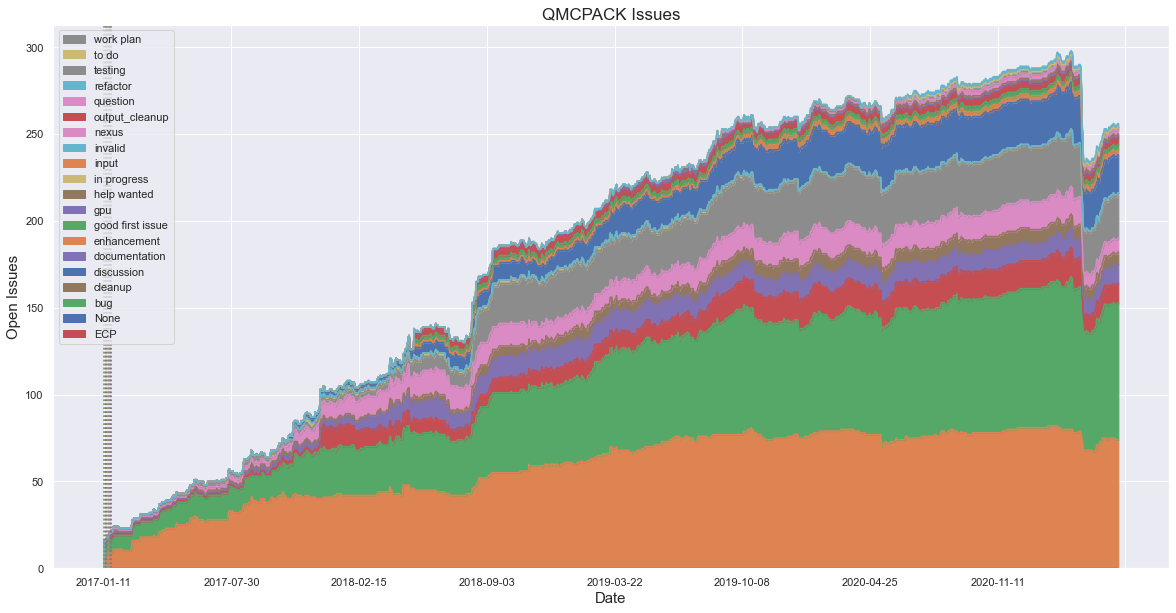

In [135]:
sns.set(rc={'figure.figsize':(20,10)})
plot_df.plot.area(x='date')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Open Issues', fontsize=15)
plt.title('QMCPACK Issues',fontsize=17)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
for k in range(15):
    ms = milestone.iloc[k+1]
    date = ms['milestone_due_on'].date().strftime('%Y-%m-%d')
    print(date)
    ax.axvline(date, color=f'C{k}', label=ms['milestone_title'], linestyle='dotted')
ax.legend(handles, labels)
plt.show();